In [1]:
print("      ")

In [46]:
#Data handling packages
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

#Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


#Metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

#Misc
import os
import warnings
warnings.filterwarnings('ignore')
sns.set()
sns.set_style("whitegrid")
sns.set_palette("pastel")

In [47]:
data = pd.read_csv("StudentsPerformance.csv")

print("Number of observations is {}".format(data.shape[0]))
print("Number of features is {}".format(data.shape[1]))
print('\n')
data.head()

Number of observations is 1000
Number of features is 8




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
data['average score'] = round((data['math score'] + data['writing score'] + data['reading score'])/3,0)
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0


<b> Depedent & Indepedent features </b>

In [59]:
X = data.drop(['math score', 'average score'], axis=1)
Y = data['math score']

print(X.shape, Y.shape)

(1000, 7) (1000,)


In [60]:
print(X.head(2))
print(Y.head(2))

   gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   

  test preparation course  reading score  writing score  
0                    none             72             74  
1               completed             90             88  
0    72
1    69
Name: math score, dtype: int64


In [61]:
num_features = X.select_dtypes(exclude='O').columns
cat_features = data.select_dtypes(include='O').columns

print("Num features: {}".format(num_features))
print("Cat features: {}".format(cat_features))

Num features: Index(['reading score', 'writing score'], dtype='object')
Cat features: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [62]:
numeric_transformer = StandardScaler()
oh_transformer      = OneHotEncoder()

preprocessor = ColumnTransformer(
[
("OneHotEncoder", oh_transformer, cat_features),
("StandardScaler", numeric_transformer, num_features)
]
)

X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [81]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.044215,1.774157
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.970952,-0.859491
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.125472,-0.201079
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.605158,0.589015


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1702)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 19) (800,)
(200, 19) (200,)


<b> Create an Evaluate Function to give all metrics after model Training </b>

In [64]:
def evaluate_model(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(y_true, y_pred)

    return mae, rmse, r2_square


In [65]:
models = {
"LinearRegression"      : LinearRegression(),
"Lasso"                 : Lasso(),
"Ridge"                 : Ridge(),
"KNeighborsRegressor"   : KNeighborsRegressor(),
"DecisionTreeRegressor" : DecisionTreeRegressor(),
"XGBRegressor"          : XGBRegressor(),
"RandomForestRegressor" : RandomForestRegressor(),
"AdaboostRegressor"     : AdaBoostRegressor(),
"CatBoostRegressor"     : CatBoostRegressor()
}

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
evaluate_model(y_test, lr_pred)

(4.416640625, 5.613334366050015, 0.823088642269945)

In [89]:
model_list = []
r2_score_list = []

for idx, (mod_name, model) in enumerate(models.items()):
    print(idx, mod_name ,model)
    
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    train_mae, train_rmse, train_r2_square = evaluate_model(y_train_pred, y_train)
    test_mae, test_rmse, test_r2_square = evaluate_model(y_test_pred, y_test)

    model_list.append(list(models.keys())[idx])
    r2_score_list.append(test_r2_square)

    print(model_list[idx])
    print("Model performance for Train set")
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2_square))

    print("Model performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2_square))

    print('-----******------')
    


    

0 LinearRegression LinearRegression()
LinearRegression
Model performance for Train set
- Root Mean Squared Error: 5.2609
- Mean Absolute Error: 4.2099
- R2 Score: 0.8704
Model performance for Test set
- Root Mean Squared Error: 5.6133
- Mean Absolute Error: 4.4166
- R2 Score: 0.7945
-----******------
1 Lasso Lasso()
Lasso
Model performance for Train set
- Root Mean Squared Error: 6.4439
- Mean Absolute Error: 5.0879
- R2 Score: 0.7374
Model performance for Test set
- Root Mean Squared Error: 6.6674
- Mean Absolute Error: 5.2434
- R2 Score: 0.6132
-----******------
2 Ridge Ridge()
Ridge
Model performance for Train set
- Root Mean Squared Error: 5.2583
- Mean Absolute Error: 4.2054
- R2 Score: 0.8708
Model performance for Test set
- Root Mean Squared Error: 5.6114
- Mean Absolute Error: 4.4182
- R2 Score: 0.7948
-----******------
3 KNeighborsRegressor KNeighborsRegressor()
KNeighborsRegressor
Model performance for Train set
- Root Mean Squared Error: 5.6964
- Mean Absolute Error: 4.5500


<b> Ridge & Linear regression model does failry well in test set as well with 79% accuracy rate </b>

In [103]:
result_df = pd.DataFrame(list(zip(model_list, r2_score_list)), columns=["Model", "R2"])
result_df.sort_values(by='R2', ascending=False, inplace=True)
result_df

,Model,R2
2,Ridge,0.794770
0,LinearRegression,0.794492
5,XGBRegressor,0.767168
8,CatBoostRegressor,0.751677
6,RandomForestRegressor,0.729553
7,AdaboostRegressor,0.693272
1,Lasso,0.613157
4,DecisionTreeRegressor,0.588236
3,KNeighborsRegressor,0.506301


<b> Ridge </b>

In [107]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)


print("Train metrics:", evaluate_model(y_train, ridge_model.predict(X_train)))
print("Test  metrics:", evaluate_model(y_test, y_pred))

Train metrics: (4.205381609810275, 5.2583221682600945, 0.885905016882728)
Test  metrics: (4.418214740714642, 5.611439929041705, 0.8232080332939554)


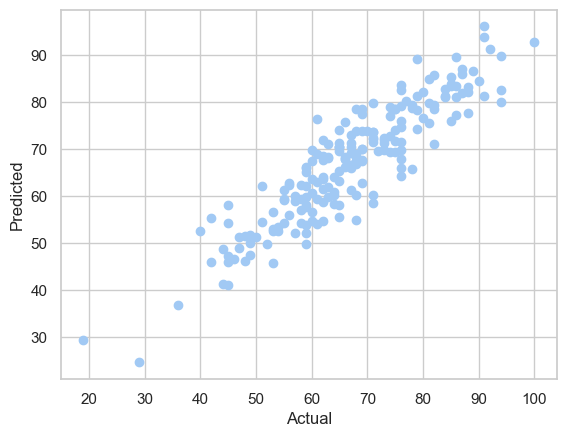

In [110]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

<Axes: xlabel='math score'>

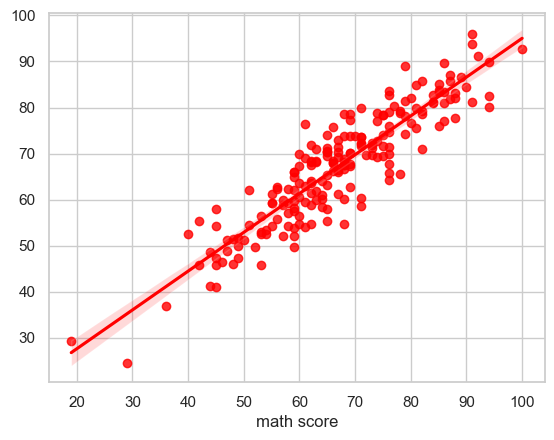

In [114]:
sns.regplot(x=y_test, y=y_pred, color='red')

In [124]:
pred_diff_df = pd.DataFrame({"Actual": y_test,
                            "Pred"  : y_pred, "Difference": y_test - y_pred})

pred_diff_df.sort_values(by="Difference") 

print(pred_diff_df["Difference"].max(), 
      pred_diff_df["Difference"].min())

13.959828384826153 -15.372638645988232
